<a href="https://colab.research.google.com/github/LoTzuChin/113-1-FinancialBigData/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install tensorflow

In [2]:
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
stock_id = '2330.TW'
end = dt.date.today()
start = end - dt.timedelta(days=1080)
df = yf.download(stock_id, start=start, end=end).reset_index()

[*********************100%***********************]  1 of 1 completed


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

# 設定窗口大小
window_size = 20
X, y = [], []
for i in range(window_size, len(df)):
    X.append(df['Close'].iloc[i-window_size:i].values)
    y.append(df['Close'].iloc[i])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0791
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0035
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0032
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0034
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0032
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0031
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0036
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0031
Epoch 13/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0034
Epoch 14/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0036
Epoch 15/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0023
Epoc

In [10]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# 可計算RMSE或MAE來分析預測誤差

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

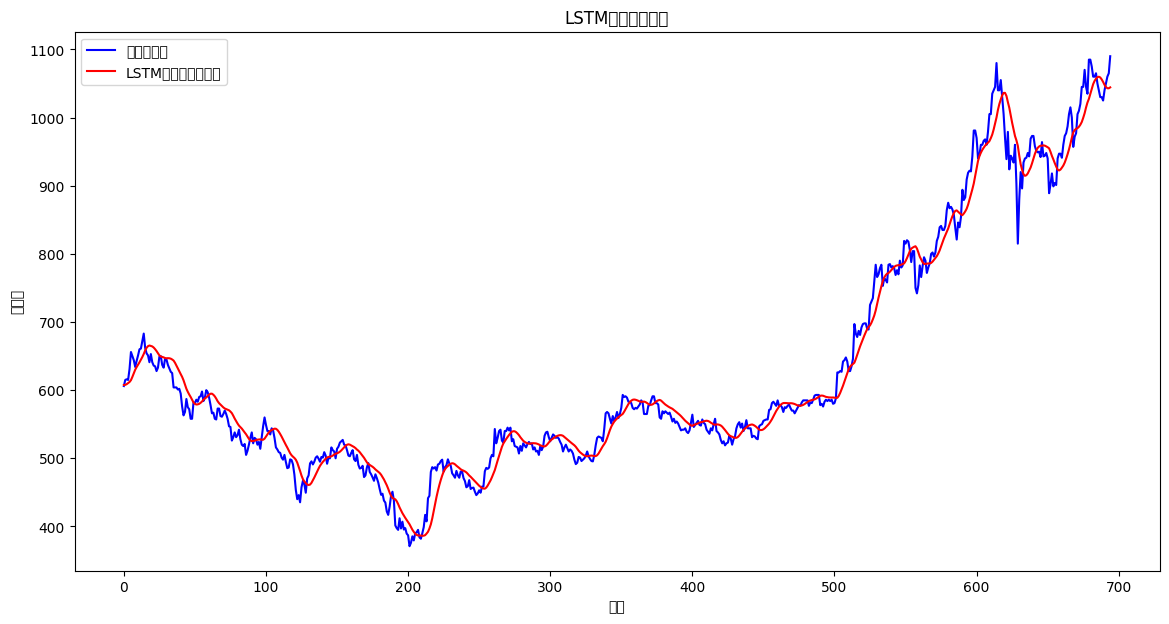

In [11]:
import matplotlib.pyplot as plt

# 進行預測
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# 繪圖：實際收盤價 vs. LSTM模型預測收盤價
plt.figure(figsize=(14, 7))
plt.plot(y_actual, color='blue', label='實際收盤價')
plt.plot(predictions, color='red', label='LSTM模型預測收盤價')
plt.title('LSTM模型預測股價')
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.legend()
plt.show()